<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering Algorithm**

**Goal:** Cluster a dataset into k different clusters. The dataset is unlabeled (unsupervised learning). Each sample is assigned to the cluster with the nearest mean.

**Iterative Optimization:**
1. Initialize culster centers (e.g. randomly)
2. Repeat until converged:

  * Update cluster labels: Assign points to the nearest cluster center (centroid)
  * Update cluster centers (centroids): Set center to the mean of each cluster

**Euclidean Distance:** Get the distance between two feature vectors.

$ d(p,q) = \sqrt{\sum(p_i - q_i)^2} $

### **Import Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['tab:orange', 'tab:blue', 'tab:green'])

In [2]:
# load dataset
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

print(X.shape)

(500, 2)


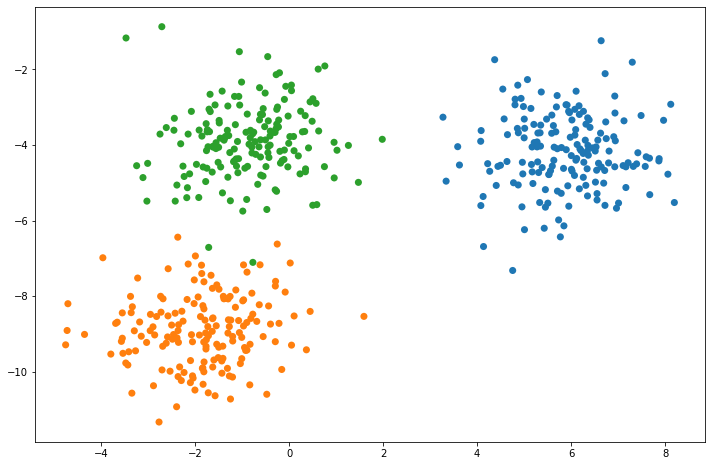

In [3]:
# plot data samples
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='none', s=50)

### **The Elbow Method**

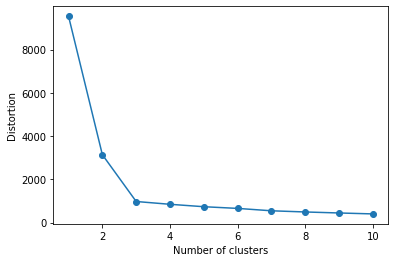

In [4]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    kmc_model = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    kmc_model.fit(X)
    distortions.append(kmc_model.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### **K-Means from scratch**

In [5]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [6]:
class KMeansModel:

  def __init__(self, K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    # list of sample indices for each cluster
    self.clusters = [[] for _ in range(self.K)]
    # the centers (mean feature vector) for each cluster
    self.centroids = []


  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize
    random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    # Optimize clusters
    for _ in range(self.max_iters):
        # Assign samples to closest centroids (create clusters)
        self.clusters = self._create_clusters(self.centroids)

        if self.plot_steps:
            self.plot()

        # Calculate new centroids from the clusters
        centroids_old = self.centroids
        self.centroids = self._get_centroids(self.clusters)

        # check if clusters have changed
        if self._is_converged(centroids_old, self.centroids):
            break

        if self.plot_steps:
            self.plot()

    # Classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusters)


  def _get_cluster_labels(self, clusters):
    # each sample will get the label of the cluster it was assigned to
    labels = np.empty(self.n_samples)

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx
    return labels


  def _create_clusters(self, centroids):
    # Assign the samples to the closest centroids to create clusters
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
        centroid_idx = self._closest_centroid(sample, centroids)
        clusters[centroid_idx].append(idx)
    return clusters

  
  def _closest_centroid(self, sample, centroids):
    # distance of the current sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_index = np.argmin(distances)
    return closest_index

  
  def _get_centroids(self, clusters):
    # assign mean value of clusters to centroids
    centroids = np.zeros((self.K, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(self.X[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

  
  def _is_converged(self, centroids_old, centroids):
    # distances between each old and new centroids, fol all centroids
    distances = [
        euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
    ]
    return sum(distances) == 0


  def plot(self):
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(self.clusters):
        point = self.X[index].T
        ax.scatter(*point)

    for point in self.centroids:
        ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()

In [7]:
clusters = len(np.unique(y))
print(clusters)

3


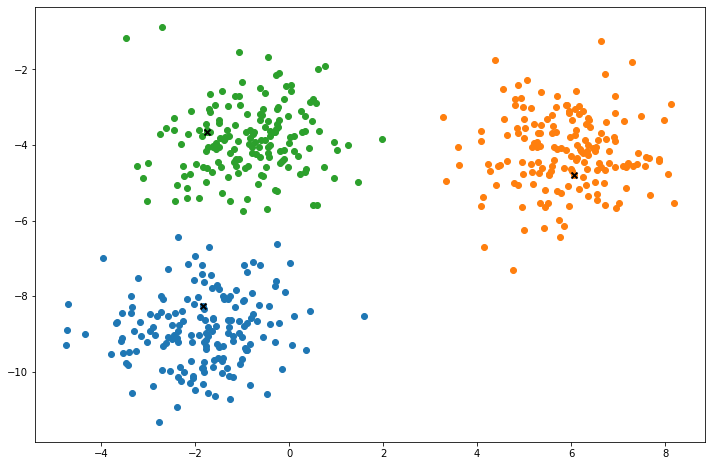

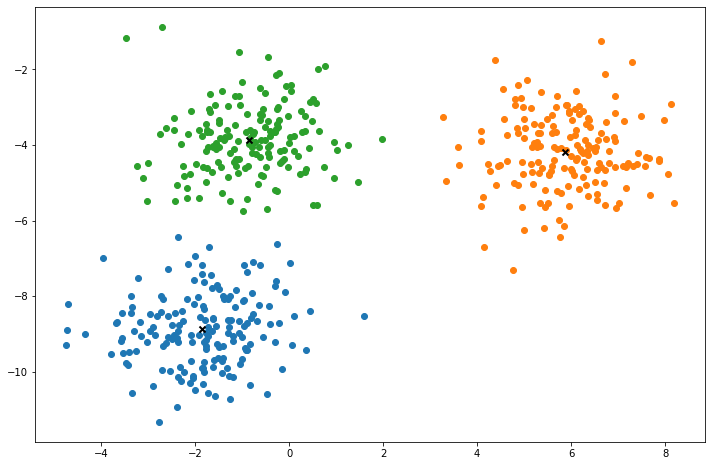

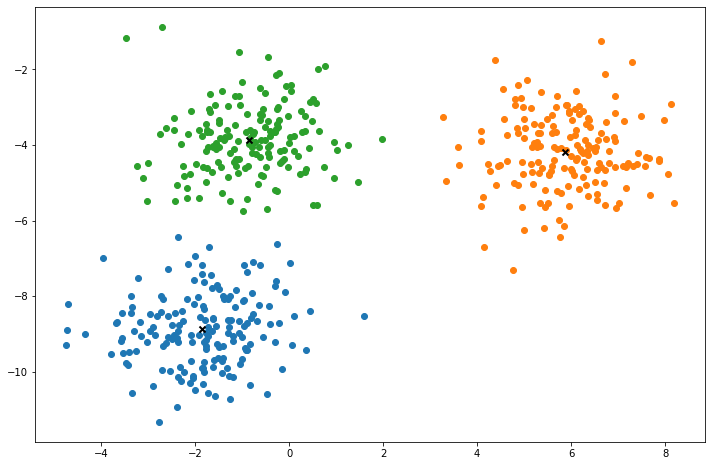

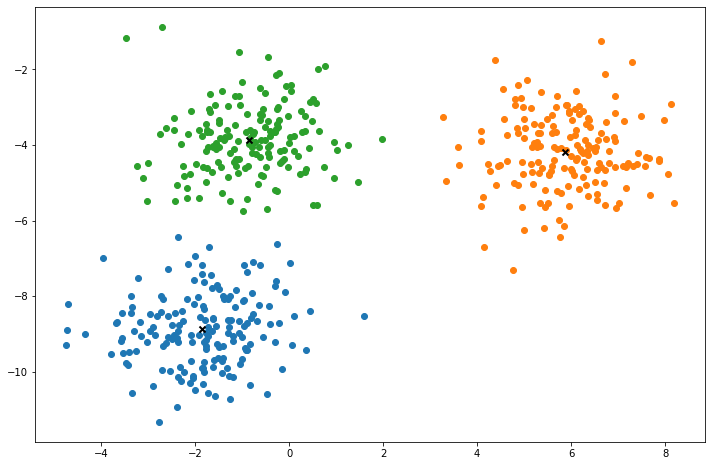

In [8]:
k = KMeansModel(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

### **K-Means using scikit-learn**

In [9]:
kmc = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_kmc = kmc.fit_predict(X)

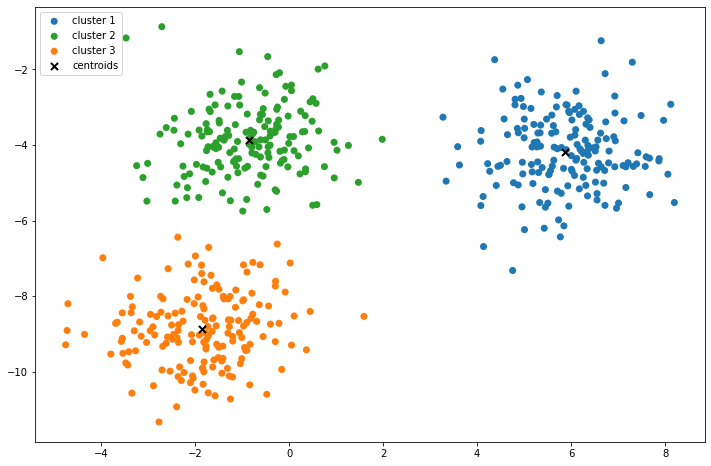

In [10]:
# plot the 3 clusters
plt.figure(figsize=(12, 8))
plt.scatter(
    X[y_kmc == 0, 0], X[y_kmc == 0, 1],
    s=50, c='tab:blue',
    marker='o', edgecolor='none',
    label='cluster 1'
)

plt.scatter(
    X[y_kmc == 1, 0], X[y_kmc == 1, 1],
    s=50, c='tab:green',
    marker='o', edgecolor='none',
    label='cluster 2'
)

plt.scatter(
    X[y_kmc == 2, 0], X[y_kmc == 2, 1],
    s=50, c='tab:orange',
    marker='o', edgecolor='none',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1],
    s=50, marker='x',
    c='black', edgecolor='black',
    linewidth=2,
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.show()